In [96]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [97]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, IntervalRootFinding 
using CairoMakie, GLMakie

In [98]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [99]:
t = 1000.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [100]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [101]:
#I0 = -1.12005964820; U0 = 0.16193284544  cusp

In [102]:
#I0 = -1.31592866634479; U0 = 0.181142312729794
I0 = -1.7441941605853748; U0 = 0.229424749082759
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [103]:
u0 = [4.09350468461962, 0.851804360585633, 0.875688899981114]  # [7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.229424749082759, 0.305, 0.3, -1.7441941605853748]
 time:          0.0
 state:         [4.09350468461962, 0.851804360585633, 0.875688899981114]


In [104]:
fp, _, _ = fixedpoints(ds, box, jacob_TM_, method = IntervalRootFinding.Newton)
println("count of fixed points: $(length(fp))");

count of fixed points: 3


In [105]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 7.93482  0.748271  0.486441
 4.07536  0.851727  0.875532
 1.04331  0.957335  0.974585

In [106]:
lb_size = 35; tck_size = 30; dis = 60;

In [116]:
index = 2
eifp = get_eigen(fp[index], p, jacob_TM_)
show_fp_eigen(get_eigen(fp[index], p, jacob_TM_))
shift = shift_vec(eifp, 1);
ds = CoupledODEs(TM, shift, p, diffeq = integ_set);

fixed point: [4.075357992278381, 0.8517268605566852, 0.8755320827561344]
---------------------------------------------------
eigenvalues: [-7.443764134057928, -0.303030301967582, 15.174618624723092]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
  0.998018   -6.02326e-8  

-0.999884
 -0.0627014   1.73214e-9   0.0152404
  0.0053873   1.0          0.000604125
---------------------------------------------------



In [108]:
tr, trange = trajectory(ds, t, Δt = tstep);

In [109]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 7.93482  0.748271  0.486441
 4.07536  0.851727  0.875532
 1.04331  0.957335  0.974585

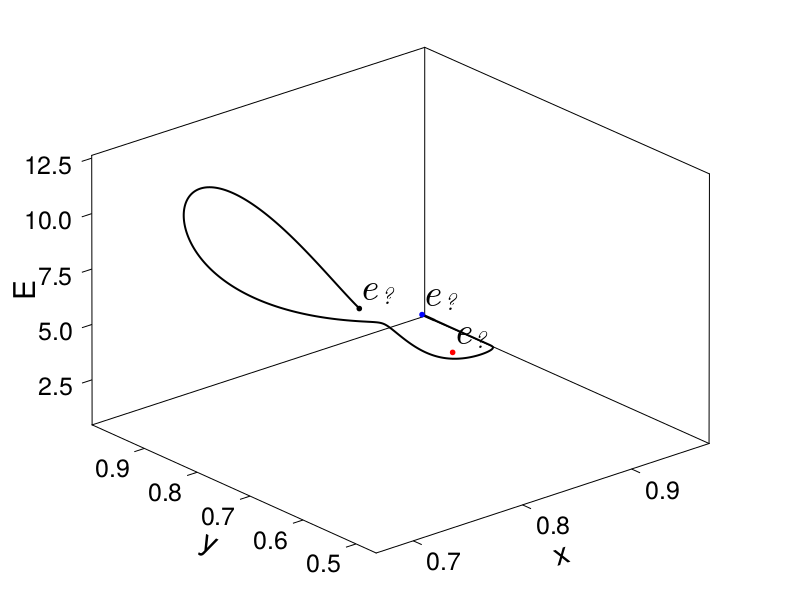

CairoMakie.Screen{IMAGE}


In [110]:
ts, tf = 1, 400000
idx, idy, idz = 2, 3, 1
lb_size = 30; tck_size = 25;
textsize = 40
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis3_1, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
linewidth = 2.0, linestyle = :solid, color = :black)

scatter!(axis3_1, fp[1][2], fp[1][3], fp[1][1], markersize = 8, color = :red)
text!(axis3_1, fp[1][2], fp[1][3], fp[1][1], text = L"e_?", fontsize = textsize)

scatter!(axis3_1, fp[2][2], fp[2][3], fp[2][1], markersize = 8, color = :black)
text!(axis3_1, fp[2][2], fp[2][3], fp[2][1], text = L"e_?", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], fp[3][1], markersize = 8, color = :blue)
text!(axis3_1, fp[3][2], fp[3][3], fp[3][1], text = L"e_?", fontsize = textsize)

display(f)

In [111]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\bt3d.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""

"pathtosave = \"C:\\Users\\Alex\\Desktop\\TM images\"\nfilename = \"\\bt3d.eps\"\nfullpath = pathtosave * filename \nsave(fullpath, f)"

In [112]:
"""idx, idy = 2, 3
lb_size = 30; tck_size = 20;
textsize = 35
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis(f[1, 1], xlabel = "x", ylabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false)


scatter!(axis3_1, fp[1][2], fp[1][3], markersize = 8, color = :red)
text!(axis3_1, fp[1][2], fp[1][3], text = L"e_?", fontsize = textsize)

#scatter!(axis3_1, fp[2][2], fp[2][3], markersize = 8, color = :black)
#text!(axis3_1, fp[2][2], fp[2][3], text = L"e_1", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], markersize = 8, color = :blue)
text!(axis3_1, fp[3][2], fp[3][3], text = L"e_?", fontsize = textsize)

display(f)"""

"idx, idy = 2, 3\nlb_size = 30; tck_size = 20;\ntextsize = 35\nCairoMakie.activate!()\nf = Figure(resolution = (800, 600), title = \"?\")\naxis3_1 = Axis(f[1, 1], xlabel = \"x\", ylabel = \"y\",\n                xlabelsize = lb_size, ylabelsize = lb_size,\n                xticklabelsi" ⋯ 269 bytes ⋯ "2], fp[2][3], markersize = 8, color = :black)\n#text!(axis3_1, fp[2][2], fp[2][3], text = L\"e_1\", fontsize = textsize)\n\nscatter!(axis3_1, fp[3][2], fp[3][3], markersize = 8, color = :blue)\ntext!(axis3_1, fp[3][2], fp[3][3], text = L\"e_?\", fontsize = textsize)\n\ndisplay(f)"

In [113]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\bt2d.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""

"pathtosave = \"C:\\Users\\Alex\\Desktop\\TM images\"\nfilename = \"\\bt2d.eps\"\nfullpath = pathtosave * filename \nsave(fullpath, f)"

In [114]:
GLMakie.activate!()
idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)